# Nature of signals

In the context of this class, a signal is the data acquired by the measurement system.  It contains much information that we need to be able to identify to extract knowledge about the system being tested and how to optimize the measurements.  A signal caries also messages and information. We will use the content of this module for the other modules seen in the rest of the class.

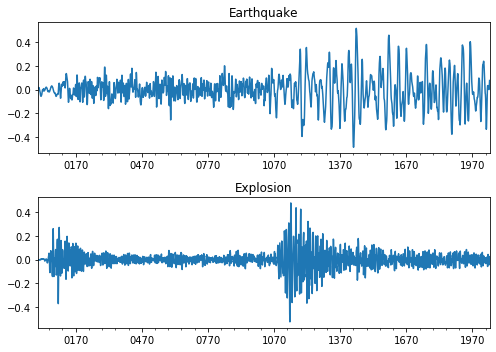

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import *


fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
#EQ5.plot(ax=axes[0], ylabel="EQ5", title="Earthquake", legend=False)
EQ5.plot(ax=axes[0], title="Earthquake", legend=False)
#EXP6.plot(ax=axes[1], ylabel="EXP6", title="Explosion", legend=False)
EXP6.plot(ax=axes[1], title="Explosion", legend=False)
fig.tight_layout()
plt.show()

## Signal classification

A signal can be characterized by its amplitude and frequency.  __Amplitude__ is related to the strength of the signal and __frequency__ to the extent or duration of the signal.  The time series of a signal is called a __waveform__.  Multipe collection of the waveform is called an __ensemble__.  

Signals can be either __deterministic__ or __random__.  

Deterministic signals can be either __static__ (do not change in time) or __dynamic__. Dynamic signals can be decomposed into __periodic__ or __aperiodic__.  A periodic signal repeats itself at regular interval.  The smallest value over whih it repeats itself is the __fundamental period__, with an associated __fundamental frequency__. A __simple__ periodic signal has one period; it is a sine wave.  A __complex__ has multiple periods and can be thought as the sum of several sinusoids (more on this in the next section).  Aperiodic signals are typically __transient__ (such as step, ramp, or pulse responses). 

Nondeterministic signals are an important class of signals that are often encountered in nature (think of turbulence, stock market, etc).  They must be analyzed with satistical tools.  They are classified as __nonstationary__ and __stationary__.  This classification enables to select the proper statistical theory to analyze them.  The properties of nondeterministic signals are computed with ensemble statistics of instantaneous properties.  In particular, one computes the ensemble average, $\mu(t_1)$, and ensemble autocorrelation function (more on the physical meaning of this function later), $R(t_1,t_1+\tau)$.

\begin{align*}
\mu(t_1) & = \frac{1}{N} \sum_{i=0}^{N-1} x_i(t_1) \\
R(t_1,t_1+\tau) & = \frac{1}{N} \sum_{i=0}^{N-1} x_i(t_1)x_i(t_1+\tau)
\end{align*}

The term ensemble means that we take N time series and perform statistics with the ensemble of the values at recorded time $t_1$.

If $\mu(t_1) = \mu$ and $R(t_1,t_1+\tau) = R(\tau)$, then the signal is considered (weakly) __stationary__ and nonstationary, otherwise.  Stationarity introdcues a lot of simplification in the statistical analysis of the data (by using a lot of tools developed for time series analysis) and one should always start by checking for signal stationarity.  Stationarity implies that signal ensemble-averaged statistical properties are independent of $t_1$.  

For most stationary signals, the temporal and ensemble statistical properties are identical.  The signal is then __ergodic__.  Thus, from a _single_ time history of length $T_r$ one can calculate $\mu$ and $R(\tau)$ (which saves time in the acquisition and analysis):

\begin{align*}
\mu & = \frac{1}{T_r} \int_{0}^{T_r} x(t) dt \\
R(\tau) & = \frac{1}{T_r} \int_{0}^{T_r} x(t)x(t+\tau) dt
\end{align*}

Thanks to statistical tools for ergodic processes, from a finite recording length of the signal, one can estimate population mean with confidence level.

## Signal variables

Most signals can be decomposed as a sum of sines and cosines (more on this in the next module).  Let's start with a simple periodic signal:

\begin{align*}
y(t) = C \sin (\omega t + \phi) = C \sin (2\pi f t + \phi)
\end{align*}

When several sine and cosine waves are added, complext waveforms result.  For example for second order dynamic system, the system response could take the form: 

\begin{align*}
y(t) = A \cos (\omega t) + B \sin (\omega t)
\end{align*}

This sum of a cosine and sine of same frequency can be rearranged as:

\begin{align*}
y(t) = C \cos (\omega t - \phi) = C \cos (\omega t - \phi + \pi/2) = C \sin (\omega t + \phi')
\end{align*}

with:
\begin{align*}
C & = \sqrt{A^2 + B^2}\\
\phi & = \tan^{-1} (B/A)\\
\phi' & = \pi/2 - \phi = \tan^{-1} (A/B)
\end{align*}

Let's look at some examples of simple and complex periodic signals.

First a simple function:

\begin{align*}
y (t) = 2 \sin (2\pi t)
\end{align*}


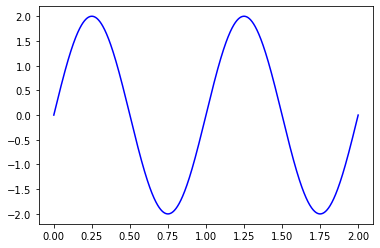

In [12]:
#import numpy
from matplotlib import pyplot
%matplotlib inline

t=np.linspace(0.0,2.0,num=1000) # (s)

y = 2 * np.sin(2*np.pi*t)
pyplot.plot(t, y, color='b', linestyle='-');

Now a complex function made of two frequencies (harmonics):

\begin{align*}
y (t) = 2 \sin (2\pi t) + 1.2 \sin (6 \pi t)
\end{align*}

The signal has two frequencies: 1 and 3 Hz.  1 Hz is the lowest frequency and is the fundamental frequency with period 1 s.  So the signal will repeat itself every second.

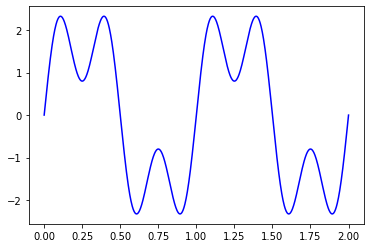

In [13]:
y = 2 * np.sin(2*np.pi*t) + 1.2 * np.sin(6*np.pi*t)

pyplot.plot(t, y, color='b', linestyle='-');

Let's now look at two sinusoidal with very close frequencies $\Delta f$.

\begin{align*}
y (t) = 2 \sin (2\pi t) + 1.2 \sin ((2+0.2) \pi t)
\end{align*}


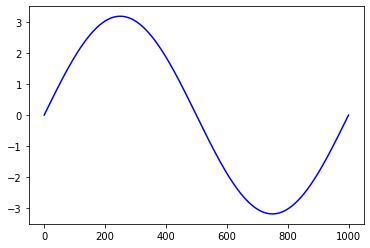

In [18]:
t=np.linspace(0.0,1000.0,num=1000) # (s)
y = 2 * np.sin(2*np.pi*t) + 1.2 * np.sin((2+0.0000001)*np.pi*t)
pyplot.plot(t, y, color='b', linestyle='-');

Here the frequency difference is $\Delta f = \frac{f_1-f_2}{f_1} = 0.2/2 = 0.1 Hz$.  The resulting signal has a slow beat with __beat__ frequency $\Delta f)$ or beat period $1/\Delta f = 10$ s, i.e. the signal repepats itself every 10 s.  Analytically (using trigonometric relations), one can show that the sum of two sine waves with close frequencies results in a signal modulated by $\cos(\Delta f/2)$.

## Detection schemes

The mixing of two signals to produce a signal (wave) with a new frequency is called heterodyning and is commonly used in instrumentation to obtain very accurate measurements.  __Heterodyne detection__ shifts the frequency content of a signal into a new range where it is easier to detected; in communucation it is called _frequency conversion_.  Heterodyning is used in laser Doppler velocimetry, tuning of musical instruments, radio receivers, etc.  

In contrast, __homodyne detection__ uses a single (homo) frequency and compares the signal with a standard oscillation that would be identical to the signal if it carried null information.  and measures the amplitude and phase of a signal to gain information.  It enables to extract information encoded as modulation of the phase and/or frequency of the signal.  In optics, this results in interferometry.  It is also the fundation behind lock-in amplifier to extract information for very weak or noisy signals.

Finally in __magnitude detection__ one only records the amplitude of signals.  This is the most common detection scheme used. 

## Statistical description of signals

